# Author:Ashutosh Banode
# GRIP: The Sparks Foundation
# Data Science and Bussiness Analytics
# TASK-1 : PREDICTION USING SUPERVISED ML
## IMPORTING LIBRARIES

In [20]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# STEP-1 : READING THE DATA

In [21]:
dataset= pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")
dataset

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [22]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [23]:
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Step 2- Summary of the given dataset

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# STEP-3: DATA VISUALIZATION

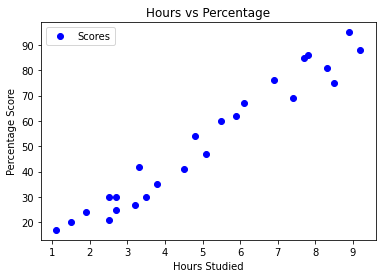

In [25]:
dataset.plot(x='Hours', y='Scores', style='o',color="blue")  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Step 4: Training of model

In [26]:
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values  

In [27]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [28]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 


LinearRegression()

# Step 5 Plotting the regression line

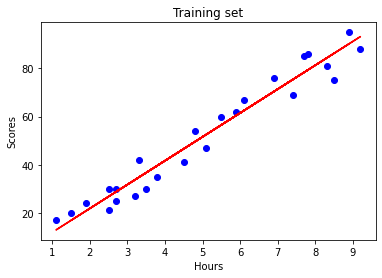

In [29]:

line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,color="blue")
plt.plot(X, line,color="red");
plt.title("Training set");
plt.xlabel('Hours')  
plt.ylabel('Scores') 
plt.show()

# STEP-6: PREDICTION AND COMPARING

In [30]:
print(X_test) 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [31]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [32]:
print('Training score :', regressor.score(X_train, y_train))
print('Test score :', regressor.score(X_test, y_test))

Training score : 0.9515510725211552
Test score : 0.9454906892105355


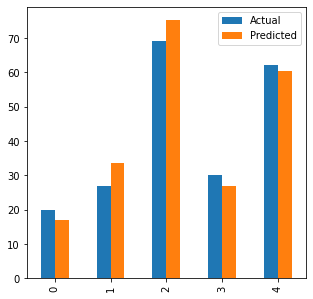

In [33]:
df.plot(kind='bar',figsize=(5,5))
plt.show()

In [34]:
Hours= 9.25
test=np.array([Hours])
test=test.reshape(-1,1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535


# STEP-7: EVALUATION

In [35]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('R-2:', 
      metrics.r2_score(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367
R-2: 0.9454906892105355
